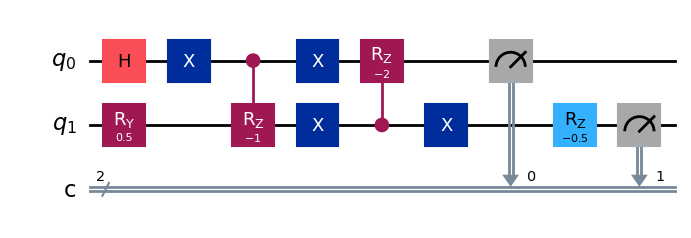

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator


simulator = AerSimulator()

from numpy import pi

# Parámetros del sistema
omega = 1.0     # Frecuencia del oscilador (en unidades naturales)
t = 1.0         # Tiempo de evolución
φ0 = -omega * t / 2         # Fase para |00⟩
φ1 = -3 * omega * t / 2     # Fase para |01⟩
φ2 = -5 * omega * t / 2     # Fase para |10⟩

# Crear circuito con 2 qubits y 2 bits clásicos para medición
qc = QuantumCircuit(2, 2)

# (Opcional) Preparar una superposición entre los tres niveles físicos válidos
qc.h(0)
qc.ry(omega*t/2, 1)  # Puedes ajustar esto según el estado que desees preparar

# Añadir fases a cada estado del subespacio: |00⟩, |01⟩, |10⟩
# Fase para |01⟩ (q0=0, q1=1)
qc.x(0)
qc.crz(φ1 - φ0, 0, 1)
qc.x(0)

# Fase para |10⟩ (q0=1, q1=0)
qc.x(1)
qc.crz(φ2 - φ0, 1, 0)
qc.x(1)

# Fase global en |00⟩ (no medible, pero se puede agregar si deseas)
qc.rz(φ0, 1)  # o en q0, no importa

# Medir en base computacional
qc.measure([0,1], [0,1])

# Dibujar el circuito
qc.draw('mpl')


In [7]:
job = AerSimulator().run(qc,shots=100)
counts = job.result().get_counts(qc)
print(counts)
# Ejecutar el circuito en el simulador


{'00': 46, '01': 49, '10': 5}


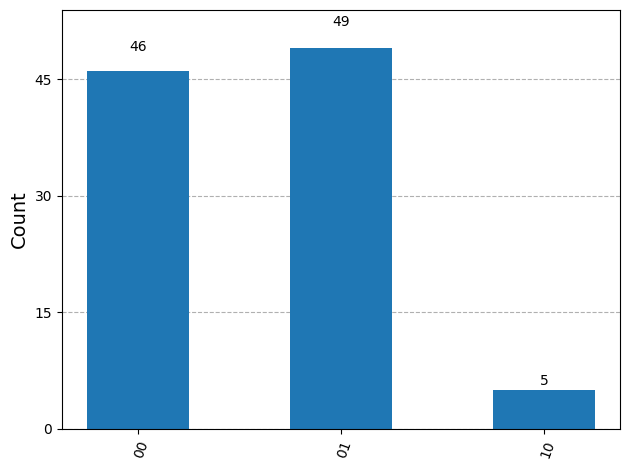

In [8]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)